## Exercise 1: Data Exploration and Preprocessing

In [89]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [90]:
# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

In [91]:
# Display first few rows
print(df.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [92]:
# Check for missing values
print(df.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


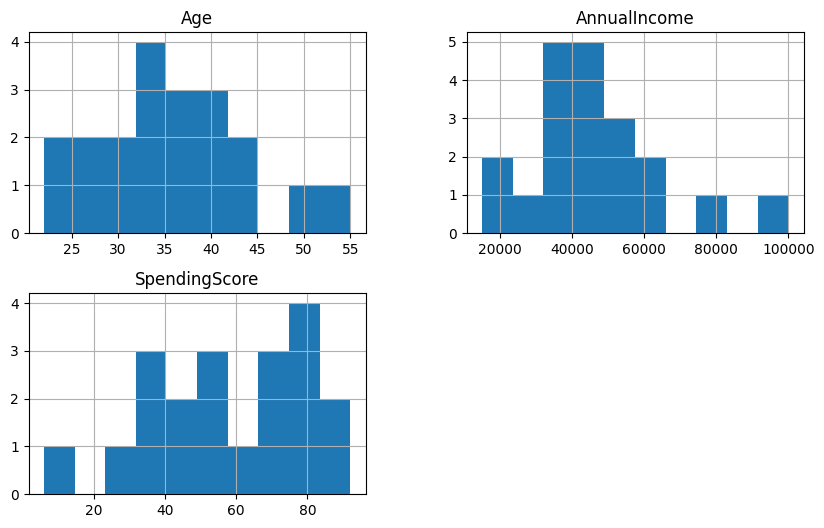

In [93]:
# Data exploration - Histograms for Age, Annual Income, and Spending Score
df[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 6))
plt.show()

In [94]:
# Data Normalization using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

In [95]:
# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


## Exercise 2: Implementing K-Means Clustering

In [96]:
from sklearn.cluster import KMeans

In [97]:
# Initial model implementation with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


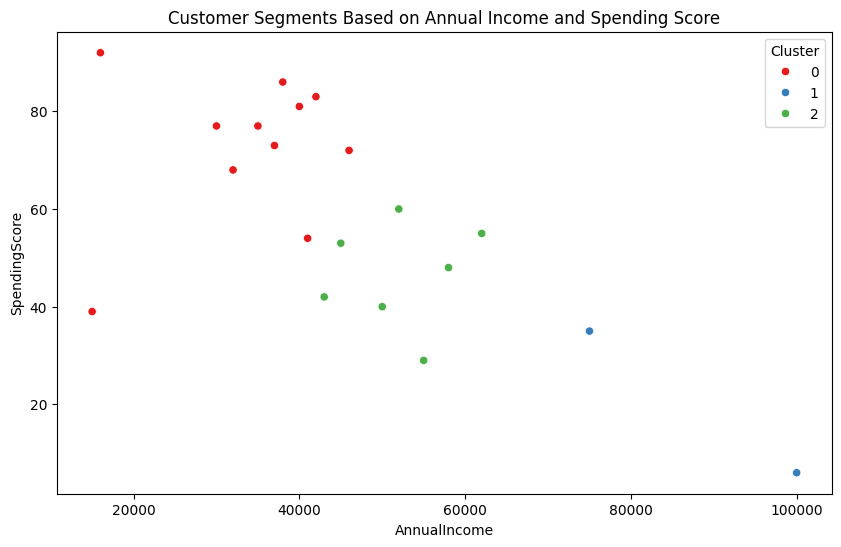

In [98]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()

In [99]:
# Elbow Method to determine the optimal k
inertia = []
k_values = range(1, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

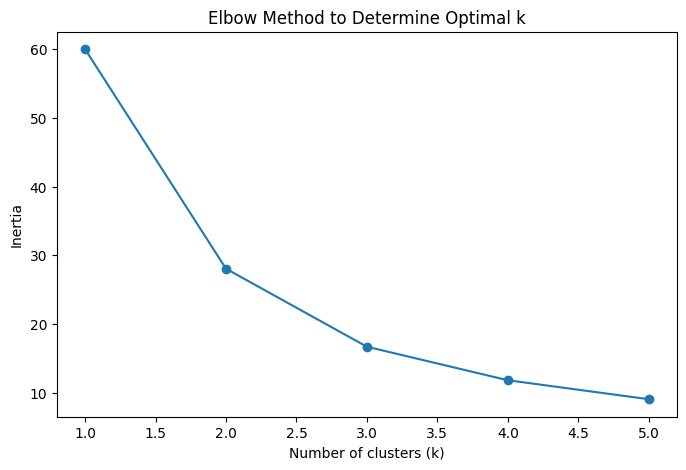

In [100]:
# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

## Exercise 3: Model Evaluation

In [101]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [102]:
# Based on the silhouette score and elbow method, let's assume k=3 is optimal
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


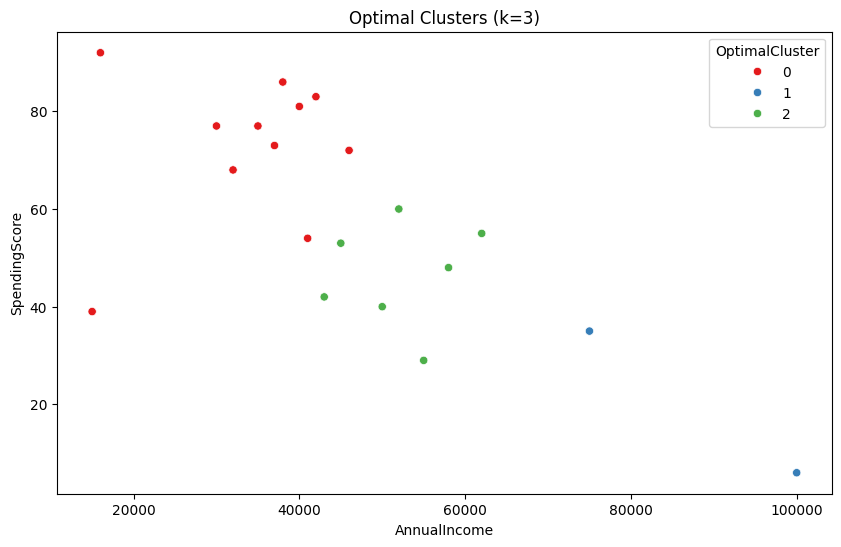

In [103]:
# Visualizing the optimal clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='Set1')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.show()

In [104]:
# Cluster analysis by averaging the features for each cluster
cluster_summary = df.groupby('OptimalCluster').mean()
print(cluster_summary)

                CustomerID        Age  AnnualIncome  SpendingScore  Cluster
OptimalCluster                                                             
0                 9.272727  30.090909  33818.181818      72.909091      0.0
1                 6.000000  52.500000  87500.000000      20.500000      1.0
2                13.714286  40.000000  52142.857143      46.714286      2.0


## Exercise 4: Interpretation and Reporting

### **Cluster Interpretation**

The K-means clustering analysis resulted in three distinct clusters, each representing different customer segments based on their age, annual income, and spending score. The characteristics of each cluster are summarized below:

*   **Cluster 0**: This cluster is characterized by younger customers (average age of approximately 30 years) with a low annual income (around $33,818) but a relatively high spending score (approximately 73). This cluster likely represents young, low-income, high-spending customers who may prioritize spending on specific categories despite their limited income.

*   **Cluster 1**: Customers in this cluster are older (average age of 52.5 years) with a high annual income (approximately $87,500) and a low spending score (around 20.5). This segment can be interpreted as older, high-income, low-spending customers, possibly indicating that they are more conservative in their spending habits.

*   **Cluster 2**: This cluster consists of middle-aged customers (average age of 40 years) with a moderate annual income (approximately $52,143) and a moderate spending score (around 46.7). This group can be described as middle-aged, moderate-income, moderate-spending customers, suggesting a balanced approach to spending relative to their income.

## **Report**

###**Data Exploration Process**

The data exploration process began with loading the dataset, which included customer demographics such as age, annual income, and spending score. Initial steps included:

*   Data Cleaning: Checking for missing values, which were found to be absent in the dataset.
*   Data Visualization: Histograms were created for age, annual income, and spending score to understand the distribution of these variables.
*   Data Normalization: The features were standardized using the StandardScaler to ensure that each feature contributed equally to the distance calculations in
K-means clustering.

Results of K-means Clustering and Optimal Value of k
The K-means clustering algorithm was applied with various values of k to determine the optimal number of clusters. The Elbow Method was utilized to visualize the inertia (sum of squared distances to the nearest cluster center) for different k values:

*  Inertia decreased as k increased, but a noticeable "elbow" was observed at k=3, suggesting that this is the optimal number of clusters.

*  Additionally, silhouette scores were computed for k values ranging from 2 to 5, with the highest score of 0.431 at k=2, but k=3 was chosen based on the Elbow Method's visual assessment.

### **Characteristics of Each Cluster**

The average characteristics of each cluster were analyzed as follows:

*  **Cluster 0**: Average Age: 30, Average Income: $33,818, Average Spending Score: 73

*  **Cluster 1**: Average Age: 52.5, Average Income: $87,500, Average Spending Score: 20.5

*  **Cluster 2**: Average Age: 40, Average Income: $52,143, Average Spending Score: 46.7

### **Insights and Observations**

The clustering analysis revealed distinct customer segments that can inform targeted marketing strategies:

*  Young, Low-Income, High-Spending Customers (Cluster 0) may be targeted with promotions that appeal to their spending habits, such as discounts or loyalty programs.

*  Older, High-Income, Low-Spending Customers (Cluster 1) might benefit from personalized marketing strategies that emphasize value and quality, potentially increasing their spending.

*  Middle-Aged, Moderate-Income, Moderate-Spending Customers (Cluster 2) represent a balanced segment that could be engaged with a mix of promotional offers and loyalty incentives.

### **Visualizations**

**Elbow Method Plot**

The Elbow Method plot visually represents the relationship between the number of clusters and inertia, indicating the optimal number of clusters at k=3.

**Silhouette Scores**

Silhouette scores for different k values provide insight into the compactness and separation of the clusters, with the highest score at k=2 but confirming the choice of k=3 due to the Elbow Method.

**Cluster Scatter Plots**

Scatter plots of clusters based on annual income and spending score visually depict the separation and characteristics of each cluster, reinforcing the interpretations made.

These visualizations are crucial for understanding the clustering results and communicating the findings effectively to stakeholders.